In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, accuracy_score, roc_auc_score

In [48]:
# Reading data from csv data file
data_train = pd.read_csv("Kaggle_Credit/cs-training.csv")
data_test = pd.read_csv("Kaggle_Credit/cs-test.csv")

In [49]:
data_train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [50]:
print(data_train.shape)
print(list(data_train.columns))

(150000, 12)
['Unnamed: 0', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


- For training dataset, we have 150000 samples

In [51]:
data_test.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [52]:
data_train.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [53]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [54]:
data_train.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [55]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            101503 non-null  int64  
 1   SeriousDlqin2yrs                      0 non-null       float64
 2   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 3   age                                   101503 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 5   DebtRatio                             101503 non-null  float64
 6   MonthlyIncome                         81400 non-null   float64
 7   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 8   NumberOfTimes90DaysLate               101503 non-null  int64  
 9   NumberRealEstateLoansOrLines          101503 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 11  

In [56]:
data_test.isnull().sum()

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

### Explore Data Analysis

Text(0, 0.5, 'Frequency')

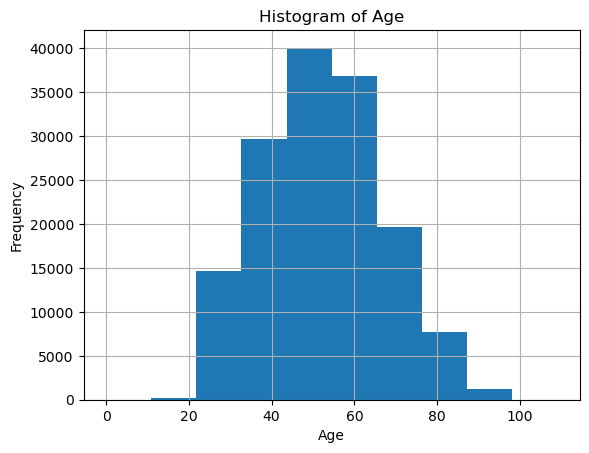

In [57]:
%matplotlib inline
data_train.age.hist()
plt.title("Histogram of Age")
plt.xlabel('Age')
plt.ylabel('Frequency')

- Age distribution is mostly over 20

In [58]:
data_train['DebtRatio'].value_counts().sort_index()

0.000000         4113
0.000026            1
0.000037            1
0.000039            1
0.000066            1
                 ... 
168835.000000       1
220516.000000       1
307001.000000       1
326442.000000       1
329664.000000       1
Name: DebtRatio, Length: 114194, dtype: int64

Text(0, 0.5, 'Frequency')

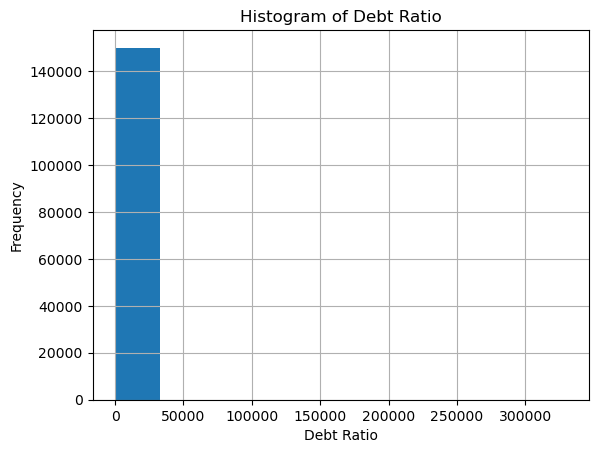

In [59]:
%matplotlib inline
data_train['DebtRatio'].hist()
plt.title("Histogram of Debt Ratio")
plt.xlabel('Debt Ratio')
plt.ylabel('Frequency')

- Distribution of debt ratio is concentrated at lower value. Removing outlier data can improve the model performance

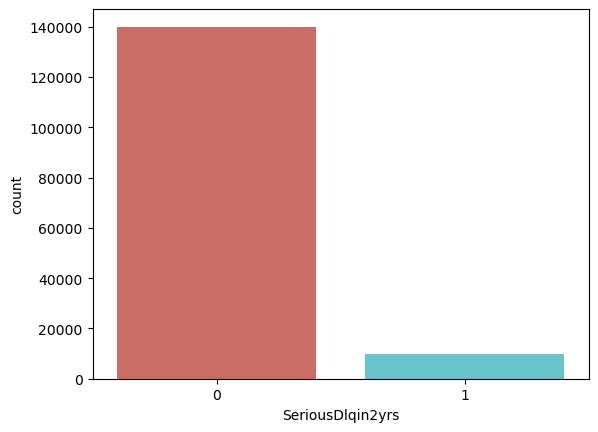

In [60]:
data_train['SeriousDlqin2yrs'].value_counts()
sns.countplot(x='SeriousDlqin2yrs', data = data_train, palette='hls')
plt.show()

In [61]:
count_no_SeriousDlqin2yrs = len(data_train[data_train['SeriousDlqin2yrs']==0])
count_SeriousDlqin2yrs = len(data_train[data_train['SeriousDlqin2yrs']==1])
pct_of_SeriousDlqin2yrs = count_SeriousDlqin2yrs/(count_no_SeriousDlqin2yrs+count_SeriousDlqin2yrs)
print("Percentage of samples defaulted is", pct_of_SeriousDlqin2yrs*100)

data_train.groupby("SeriousDlqin2yrs").mean()

Percentage of samples defaulted is 6.683999999999999


,Unnamed: 0,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,,,,,,,,,,,
0,74968.042429,6.168855,52.751375,0.280109,357.151168,6747.837774,8.493620,0.135225,1.020368,0.126666,0.743417
1,75453.643427,4.367282,45.926591,2.388490,295.121066,5630.826493,7.882306,2.091362,0.988530,1.828047,0.948208


In [62]:
data_train['NumberOfTimes90DaysLate'].value_counts().sort_index()

0     141662
1       5243
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       264
Name: NumberOfTimes90DaysLate, dtype: int64

In [63]:
data_train['NumberOfTime60-89DaysPastDueNotWorse'].value_counts().sort_index()

0     142396
1       5731
2       1118
3        318
4        105
5         34
6         16
7          9
8          2
9          1
11         1
96         5
98       264
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [64]:
data_train['NumberOfTime30-59DaysPastDueNotWorse'].value_counts().sort_index()

0     126018
1      16033
2       4598
3       1754
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       264
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

- The values of 96 and 98  of `['NumberOfTimes90DaysLate']` , `['NumberOfTime60-89DaysPastDueNotWorse']`, and `['NumberOfTime30-59DaysPastDueNotWorse']` are oddly equal. Therefore, we will remove these samples in our training models

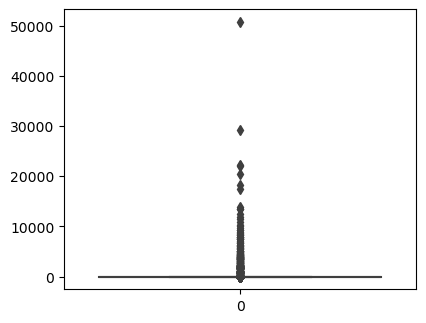

In [65]:
plt.figure(figsize=[10,8])
plt.subplot(221)
sns.boxplot(data=data_train['RevolvingUtilizationOfUnsecuredLines'])
plt.show()

In [66]:
data_train[data_train['RevolvingUtilizationOfUnsecuredLines'] > 10].SeriousDlqin2yrs.describe()

count    241.000000
mean       0.070539
std        0.256587
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: SeriousDlqin2yrs, dtype: float64

In [67]:
data_train[(data_train['RevolvingUtilizationOfUnsecuredLines'] < 10) & (data_train['RevolvingUtilizationOfUnsecuredLines'] >0.9)].SeriousDlqin2yrs.describe()

count    19828.000000
mean         0.225388
std          0.417848
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: SeriousDlqin2yrs, dtype: float64

In [68]:
data_train[data_train['RevolvingUtilizationOfUnsecuredLines'] <= 0.4].SeriousDlqin2yrs.describe()

count    101553.000000
mean          0.024795
std           0.155500
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: SeriousDlqin2yrs, dtype: float64

- 25% of data is between 0.4 and 10

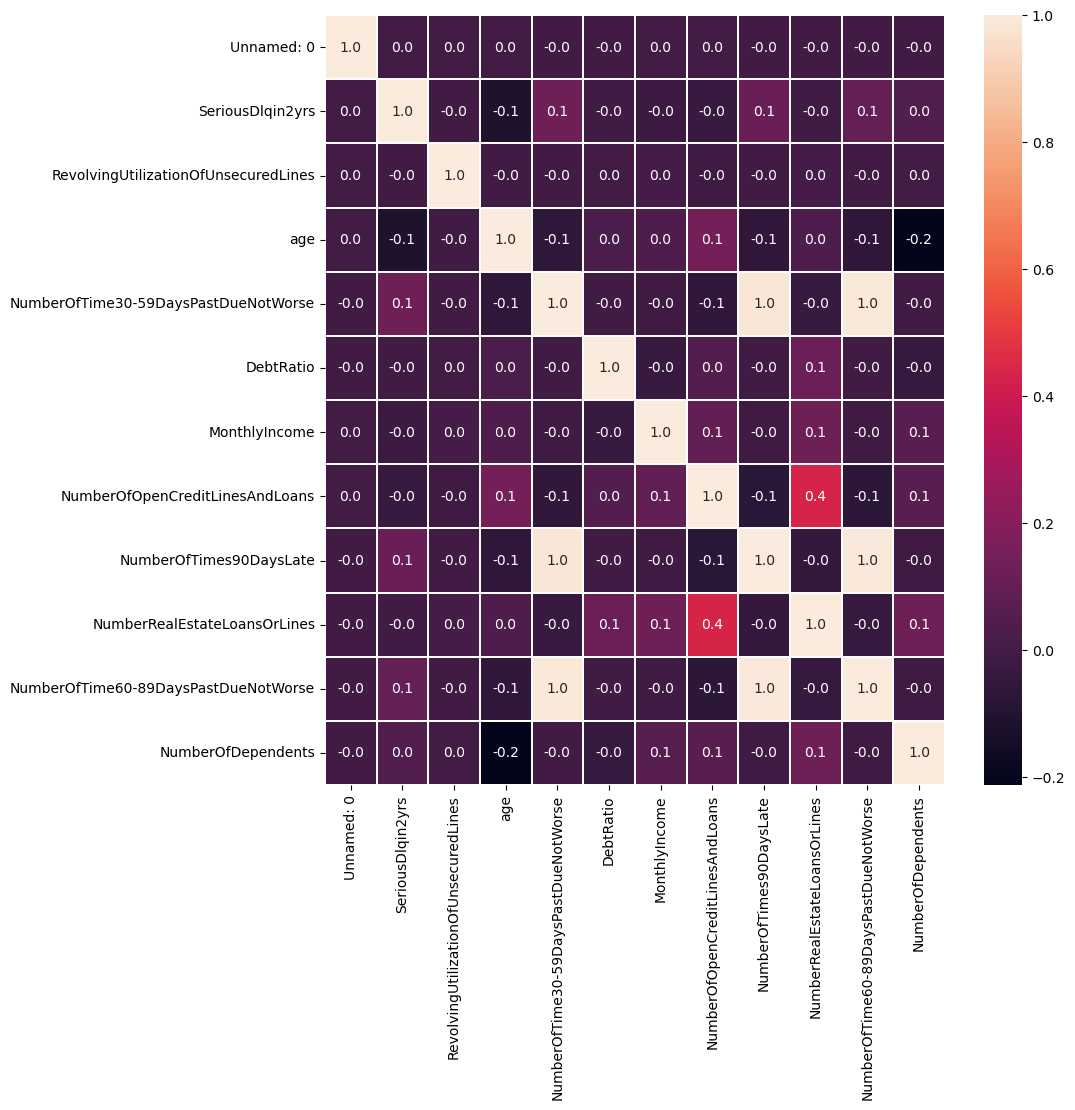

In [69]:
f = plt.subplots(figsize=(10, 10))
sns.heatmap(data_train.corr(method='pearson'), annot=True, linewidths=.1,fmt= '.1f')
plt.show()

#### Observation:
- Classes are imbalanced
- The average age of borrowers who defaulted is lower than those who did not
- The average monthly income is lower those with high risk of deliquency
- The number of open credit lines and loans, debt ratio, and number of mortgage and real estate loans are suprisingly lower for those with high credit risk
- Number of times borrower has been past due for30-59, 60-89, or over 90 days is significantly higher in borrowers with high credit risk
- Debt ratio is mostly in the 95 percentile
- 25% of data in `RevolvingUtilizationOfUnsecuredLines` is between 0.4 and 10

### Data Processing

In [70]:
# Drop 'Unnamed' column
data_train = data_train.drop(columns = ['Unnamed: 0'])
data_test = data_test.drop(columns = ['Unnamed: 0'])
data_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [71]:
# Impute missing values
from sklearn.impute import SimpleImputer

imp_median = SimpleImputer(strategy='median')
imp_mostFreq = SimpleImputer(strategy="most_frequent")

imp_median.fit(data_train[["MonthlyIncome"]])
imp_mostFreq.fit(data_train[["NumberOfDependents"]])

data_train1 = data_train.copy()

data_train1[["MonthlyIncome"]] = imp_median.transform(data_train[['MonthlyIncome']])
data_train1[["NumberOfDependents"]] = imp_mostFreq.transform(data_train[['NumberOfDependents']])

data_train1.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [72]:
data_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         150000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    150000 non-null  float64
dtype

In [73]:
# The same is done for testing data
imp_median.fit(data_test[["MonthlyIncome"]])
imp_mostFreq.fit(data_test[["NumberOfDependents"]])

data_test1 = data_test.copy()

data_test1[["MonthlyIncome"]] = imp_median.transform(data_test[['MonthlyIncome']])
data_test1[["NumberOfDependents"]] = imp_mostFreq.transform(data_test[['NumberOfDependents']])

data_test1.isnull().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                           0
dtype: int64

In [74]:
data_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         150000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    150000 non-null  float64
dtype

In [75]:
#X_train, y_train = data_train.loc[:, data_train.columns != 'SeriousDlqin2yrs'], data_train['SeriousDlqin2yrs']
#X_test, y_test = data_test.loc[:, data_train.columns != 'SeriousDlqin2yrs'], data_test['SeriousDlqin2yrs']

X_train1, X_test1, y_train1, y_test1 = train_test_split(data_train1.drop(columns=['SeriousDlqin2yrs']),
                                                    data_train1.SeriousDlqin2yrs,
                                                    test_size = 0.2,
                                                    stratify = data_train1.SeriousDlqin2yrs,
                                                    random_state = 1)


In [76]:
def modelScore(model, train_x, train_y):
    scores = cross_validate(model, train_x, train_y, scoring = ('accuracy', 'precision', 'recall', 'f1', 'roc_auc'), cv=5)
    return scores

def validateModels(models, train_x, train_y):
    for m in models:
        print("Model name: ", m)
        scores = modelScore(models[m], train_x, train_y)
        print("Accuracy: {:.2f}%".format(100 * scores['test_accuracy'].mean()))
        print("Precision: {:.2f}%".format(100 * scores['test_precision'].mean()))
        print("Recall: {:.2f}%".format(100 * scores['test_recall'].mean()))
        print("F1 score: {:.2f}%".format(100 * scores['test_f1'].mean()))
        print("AUC score: {:.2f}%".format(100 * scores['test_roc_auc'].mean()))
        print("\n")
        
def evaluateModels(models,train_x, train_y, test_x, test_y):
    fpr = None
    AUC_scores = {}
    for m in models:
        models[m].fit(train_x, train_y)
        pred = models[m].predict(test_x)
        pred_prob = models[m].predict_proba(test_x)
        fpr, tpr, thresholds = roc_curve(test_y, pred_prob[:, 1])
        roc_auc = roc_auc_score(test_y, pred_prob[:, 1])
        con_matx = confusion_matrix(test_y, pred)
        AUC_scores[m] = [roc_auc, con_matx]
        plt.plot(fpr, tpr)
        
    plt.plot(fpr, fpr, linestyle = '--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.show()
    for s in AUC_scores:
        print('AUC score of {}: {:.2f}%'.format(s, AUC_scores[s][0]*100))
        print("Confusion Matrix")
        print(AUC_scores[s][1])
        print("\n")

In [77]:
scaler = StandardScaler()
def scaleData(train_x, test_x):
    scaler.fit(train_x)
    scaled_train_x = scaler.transform(train_x)
    scaled_test_x = scaler.transform(test_x)
    return scaled_train_x, scaled_test_x

In [78]:
rfc = RandomForestClassifier(random_state=1)
lr = LogisticRegression(max_iter=2000)
gb = GradientBoostingClassifier()
mlp = MLPClassifier(solver='adam', 
                    alpha=1e-5,
                    hidden_layer_sizes=(20,10), 
                    random_state=1,
                    max_iter = 1000)

models = {'Random Forest Classifier': rfc, 
          "Logistic Regression": lr, 
          'Gradient Boosting Classifier': gb,
          "Multiple Layer Perceptron": mlp}

In [79]:
validateModels(models, X_train1, y_train1)

Model name:  Random Forest Classifier
Accuracy: 93.56%
Precision: 55.26%
Recall: 19.37%
F1 score: 28.67%
AUC score: 83.98%


Model name:  Logistic Regression
Accuracy: 93.33%
Precision: 51.07%
Recall: 3.60%
F1 score: 6.73%
AUC score: 69.62%


Model name:  Gradient Boosting Classifier
Accuracy: 93.72%
Precision: 59.12%
Recall: 19.95%
F1 score: 29.81%
AUC score: 86.49%


Model name:  Multiple Layer Perceptron
Accuracy: 92.76%
Precision: 51.84%
Recall: 19.19%
F1 score: 22.70%
AUC score: 71.65%




In [80]:
X_train1_scaled, X_test1_scaled = scaleData(X_train1, X_test1)
validateModels(models, X_train1_scaled, y_train1)

Model name:  Random Forest Classifier
Accuracy: 93.54%
Precision: 54.70%
Recall: 19.34%
F1 score: 28.56%
AUC score: 84.11%


Model name:  Logistic Regression
Accuracy: 93.39%
Precision: 58.08%
Recall: 4.19%
F1 score: 7.81%
AUC score: 69.89%


Model name:  Gradient Boosting Classifier
Accuracy: 93.72%
Precision: 58.97%
Recall: 19.92%
F1 score: 29.76%
AUC score: 86.49%


Model name:  Multiple Layer Perceptron
Accuracy: 93.65%
Precision: 58.14%
Recall: 17.85%
F1 score: 27.31%
AUC score: 83.58%




In [81]:
selected_models = { 'Random Forest Classifier': rfc, 
          'Gradient Boosting Classifier': gb,
          "Multiple Layer Perceptron": mlp}

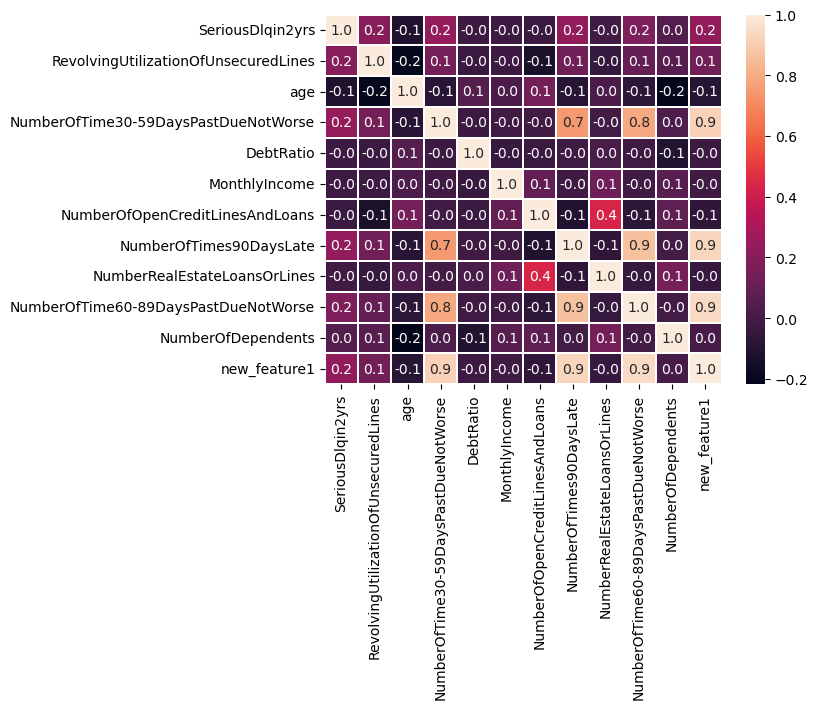

In [82]:
data_train2 = data_train1.copy()

data_train2['NumberOfTime30-59DaysPastDueNotWorse'].mask(data_train2["NumberOfTime30-59DaysPastDueNotWorse"] > 95, 20, inplace=True)
data_train2['NumberOfTime60-89DaysPastDueNotWorse'].mask(data_train2["NumberOfTime60-89DaysPastDueNotWorse"] > 95, 20, inplace=True)
data_train2["NumberOfTimes90DaysLate"].mask(data_train2['NumberOfTimes90DaysLate'] > 95, 20, inplace=True)

data_train2['RevolvingUtilizationOfUnsecuredLines'].mask(data_train2['RevolvingUtilizationOfUnsecuredLines']>10, 10, inplace=True)
data_train2['new_feature1'] =  data_train2['NumberOfTimes90DaysLate'] + data_train2['NumberOfTime60-89DaysPastDueNotWorse'] + data_train2['NumberOfTime30-59DaysPastDueNotWorse']
data_train2 = data_train2[data_train2['age']>20]
data_train2 = data_train2.loc[(data_train2['DebtRatio'] <= data_train2['DebtRatio'].quantile(0.95))]


X_train2, X_test2, y_train2, y_test2 = train_test_split(data_train2.drop(columns=['SeriousDlqin2yrs']),
                                                    data_train2.SeriousDlqin2yrs,
                                                    test_size = 0.2,
                                                    stratify= data_train2.SeriousDlqin2yrs,
                                                    random_state = 1)

sns.heatmap(data_train2.corr(method='pearson'), annot=True, linewidths=.1,fmt= '.1f')
plt.show()

In [83]:
validateModels(selected_models, X_train2, y_train2)

Model name:  Random Forest Classifier
Accuracy: 93.42%
Precision: 53.32%
Recall: 19.49%
F1 score: 28.54%
AUC score: 84.17%


Model name:  Gradient Boosting Classifier
Accuracy: 93.65%
Precision: 58.76%
Recall: 19.78%
F1 score: 29.58%
AUC score: 86.65%


Model name:  Multiple Layer Perceptron
Accuracy: 78.21%
Precision: 39.60%
Recall: 34.90%
F1 score: 21.78%
AUC score: 76.59%




In [84]:
X_train2_scaled, X_test2_scaled = scaleData(X_train2, X_test2)
validateModels(selected_models, X_train2_scaled, y_train2)

Model name:  Random Forest Classifier
Accuracy: 93.41%
Precision: 53.21%
Recall: 19.23%
F1 score: 28.25%
AUC score: 84.04%


Model name:  Gradient Boosting Classifier
Accuracy: 93.64%
Precision: 58.49%
Recall: 19.93%
F1 score: 29.72%
AUC score: 86.64%


Model name:  Multiple Layer Perceptron
Accuracy: 93.58%
Precision: 58.10%
Recall: 17.46%
F1 score: 26.84%
AUC score: 86.46%




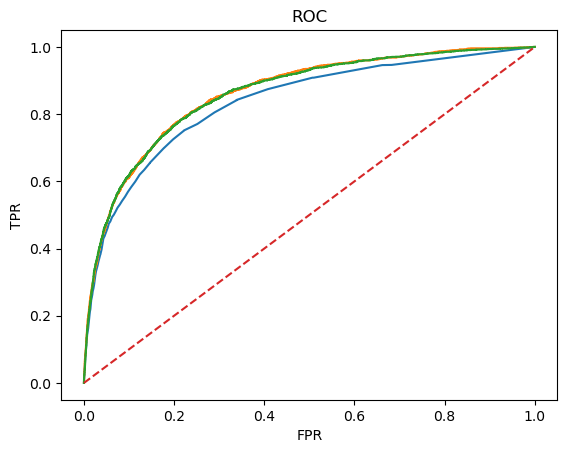

AUC score of Random Forest Classifier: 83.52%
Confusion Matrix
[[26291   287]
 [ 1574   349]]


AUC score of Gradient Boosting Classifier: 86.24%
Confusion Matrix
[[26352   226]
 [ 1558   365]]


AUC score of Multiple Layer Perceptron: 86.08%
Confusion Matrix
[[26330   248]
 [ 1571   352]]




In [85]:
evaluateModels(selected_models, X_train2_scaled, y_train2, X_test2_scaled, y_test2)